In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
#데이터 불러오기

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [44]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]


In [45]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 1.0, 0.011764707)

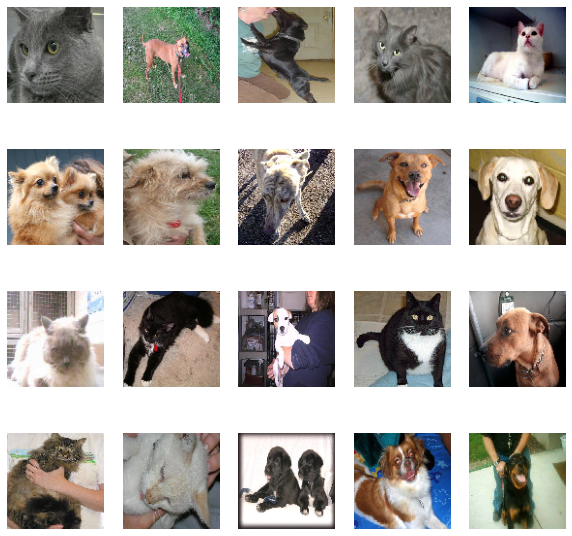

In [46]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [47]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [48]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [49]:
#CNN적용

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(100,100,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 25, 25, 64)       

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [52]:
history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

C:\Users\gnos4\AppData\Local\Temp\ipykernel_1728\19702832.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=100,


Epoch 1/40
100/100 [==============================] - 52s 499ms/step - loss: 0.6970 - acc: 0.5110 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/40
100/100 [==============================] - 50s 503ms/step - loss: 0.6820 - acc: 0.5495 - val_loss: 0.6542 - val_acc: 0.6060
Epoch 3/40
100/100 [==============================] - 49s 491ms/step - loss: 0.6589 - acc: 0.5945 - val_loss: 0.6413 - val_acc: 0.5950
Epoch 4/40
100/100 [==============================] - 50s 499ms/step - loss: 0.6504 - acc: 0.6255 - val_loss: 0.6196 - val_acc: 0.6390
Epoch 5/40
100/100 [==============================] - 50s 498ms/step - loss: 0.6104 - acc: 0.6715 - val_loss: 0.5942 - val_acc: 0.6680
Epoch 6/40
100/100 [==============================] - 50s 504ms/step - loss: 0.5995 - acc: 0.6750 - val_loss: 0.6167 - val_acc: 0.6530
Epoch 7/40
100/100 [==============================] - 50s 499ms/step - loss: 0.5926 - acc: 0.6790 - val_loss: 0.5757 - val_acc: 0.7030
Epoch 8/40
100/100 [==============================] - 4

In [2]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

NameError: name 'plt' is not defined

In [55]:
model.save('cats_and_dogs_model_1.h5')  # creates a HDF5 file

In [56]:
#Image Augmentation(케라스 창시자에게 배우는 딥러닝193쪽 부터)

In [57]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [58]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [59]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 150, 150, 3) (20,)
[1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.]


In [60]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((150, 150, 3), dtype('float32'), 0.9997621, 0.00037479828)

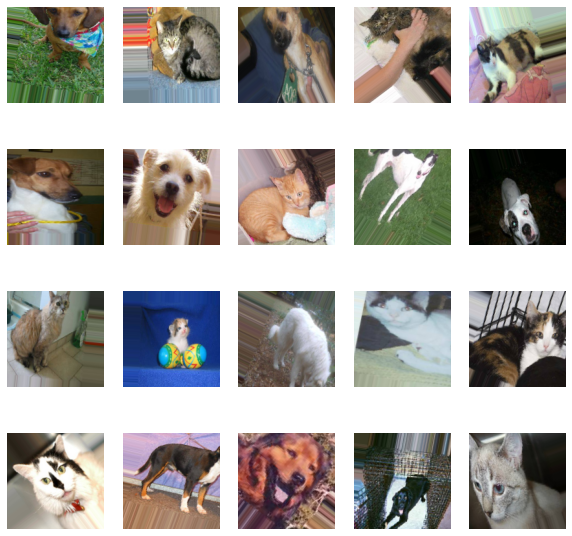

In [61]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [62]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [63]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [65]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['acc'])

In [66]:
history = model.fit_generator(train_generator, epochs=80, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

C:\Users\gnos4\AppData\Local\Temp\ipykernel_1728\2472174630.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=80, steps_per_epoch=100,


Epoch 1/80
100/100 [==============================] - 80s 761ms/step - loss: 0.6924 - acc: 0.5115 - val_loss: 0.6988 - val_acc: 0.5000
Epoch 2/80
100/100 [==============================] - 30s 298ms/step - loss: 0.6791 - acc: 0.5525 - val_loss: 0.6587 - val_acc: 0.6000
Epoch 3/80
100/100 [==============================] - 32s 322ms/step - loss: 0.6621 - acc: 0.5875 - val_loss: 0.7432 - val_acc: 0.5140
Epoch 4/80
100/100 [==============================] - 33s 329ms/step - loss: 0.6443 - acc: 0.6195 - val_loss: 0.7108 - val_acc: 0.5410
Epoch 5/80
100/100 [==============================] - 33s 334ms/step - loss: 0.6275 - acc: 0.6420 - val_loss: 0.6619 - val_acc: 0.6010
Epoch 6/80
100/100 [==============================] - 35s 349ms/step - loss: 0.6170 - acc: 0.6490 - val_loss: 0.6143 - val_acc: 0.6410
Epoch 7/80
100/100 [==============================] - 33s 326ms/step - loss: 0.6124 - acc: 0.6515 - val_loss: 0.5797 - val_acc: 0.6770
Epoch 8/80
100/100 [==============================] - 3

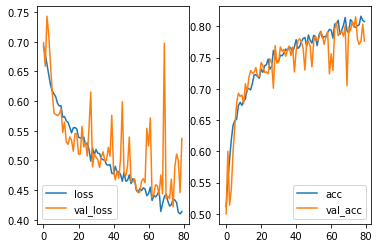

In [67]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [68]:
model.save('cats_and_dogs_model_2.h5')  # creates a HDF5 file

In [69]:
test_datagen = ImageDataGenerator(rescale=1/255.)

In [70]:
test_generator = test_datagen.flow_from_directory(
    'cats_and_dogs_small/test',
    target_size=(150,150),
    batch_size=20,
    shuffle=False, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [71]:
pred_y = model.predict(test_generator)

50/50 [==============================] - 5s 87ms/step


In [72]:
pred_y.shape

(1000, 1)

In [73]:

(pred_y[:500,0]<0.5).sum()

358

In [74]:
(pred_y[500:,0]>0.5).sum()

403

In [75]:

(410+399)/1000

0.809

In [ ]:
#전이 학습
#08번 ppt참고하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
help(keras.applications.vgg16.VGG16) #훈련된 것을 가지고 오기 위해서

Help on function VGG16 in module keras.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')
    Instantiates the VGG16 model.
    
    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    The default input size for this model is 224x224.
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the model.
    `vgg16.pr

In [ ]:
model = keras.applications.vgg.VGG(iclude_top=True)

In [ ]:
model.summary()
#표의 의미
#input 224(세로), 224(가로)컬러사진이라는 의미'
#필터를 64장 적용했다.
#쿨링을 만나 사진 크기가 반으로 줄어들어 크기가 112가되고  필터128적용

In [ ]:
#inception

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, 
                         #include_top=False, : 제일띁부분은 내가 원하는 것을 가지고와서 붙여 훈련시키겠다
                        input_shape=(299,299,3))